In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [4]:
# Define a function to plot the confusion matrix

def plot_confusion_matrix(y, y_pred):

    cm = confusion_matrix(y, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, ax = ax)
    ax.set_xlabel("Predicted Lables")
    ax.set_ylabel("True Lables")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()
    plt.close()  

In [22]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data1 = pd.read_csv(url1)

url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url2)

In [20]:
y = pd.Series(data1["Class"].to_numpy())

In [21]:
y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Length: 90, dtype: int64

In [44]:
#Split the data for training and testing, and standardize the X data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = preprocessing.StandardScaler()

X_train_scale = scaler.fit_transform(X_train) # This fits the scaler object to the training data and standardizes it
X_test_scale = scaler.transform(X_test) # This standardizes the testing data using the parameters learned from the training data, avoiding leakage

In [80]:
y_test.shape

(18,)

In [136]:
y_train.shape

(72,)

In [50]:
# Create a logistic regression object and a GridSearchCV object

# define some parameters for grid search

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train_scale, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [49]:
logreg_cv.score(X_test_scale, y_test)

0.8333333333333334

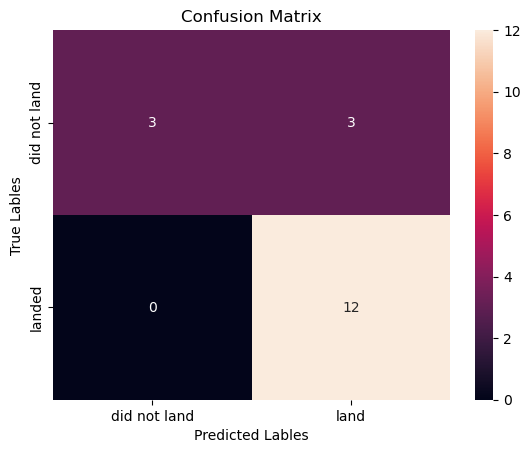

In [57]:
# Plot the confusion matrix

yhat=logreg_cv.predict(X_test_scaled)
plot_confusion_matrix(y_test, yhat)

In [81]:
# Define an SVC model and perform grid search

parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)

svm_cv.fit(X_train_scale, y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [64]:
svm_cv.score(X_test_scale, y_test)

0.8333333333333334

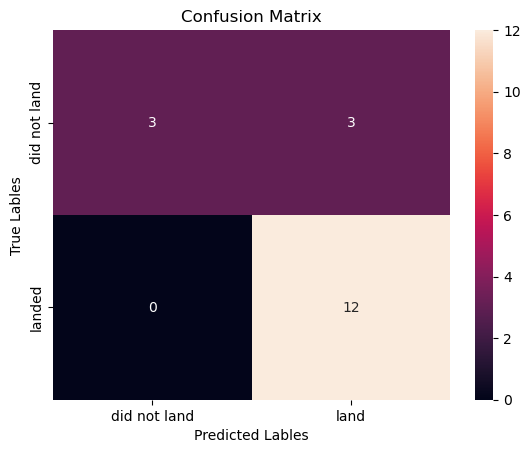

In [68]:
yhat_svm=svm_cv.predict(X_test_scaled)
plot_confusion_matrix(y_test,yhat_svm)

In [144]:
# Create a decision tree classifier object

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train_scale, y_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9017857142857144


In [145]:
tree_cv.score(X_test_scale, y_test)

0.8333333333333334

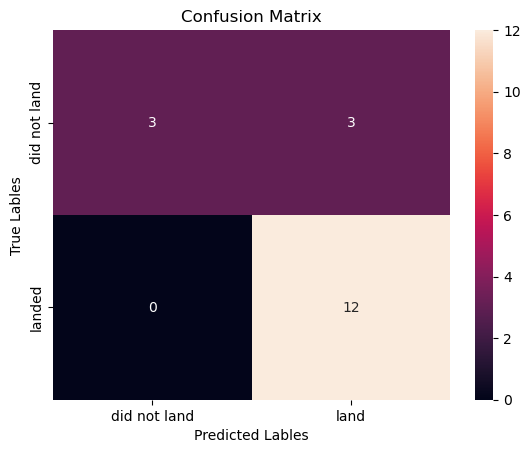

In [146]:
yhat_tree=tree_cv.predict(X_test_scaled)
plot_confusion_matrix(y_test,yhat_tree)

In [75]:
# K-nearest neighbours

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

KNN_cv = GridSearchCV(KNN, parameters, cv = 10)
KNN_cv.fit(X_train_scale, y_train)

print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [76]:
KNN_cv.score(X_test_scale, y_test)

0.8333333333333334

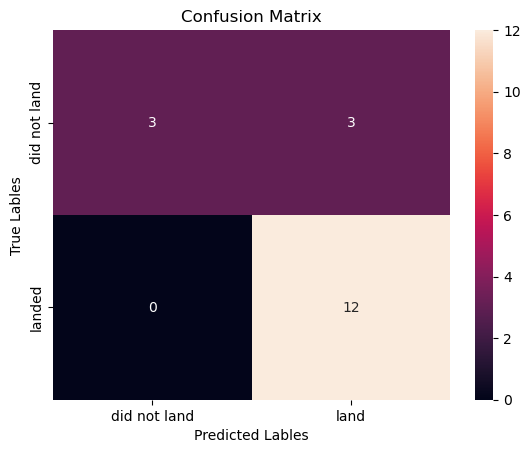

In [79]:
yhat_KNN=KNN_cv.predict(X_test_scaled)
plot_confusion_matrix(y_test,yhat_KNN)